In [134]:
import itertools as it
import more_itertools as more_it
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import operator
%matplotlib inline

# Example with a convolution

Edge detection algorithm- example with a Sobel filter - A 'non-standard' use of 1D tools in 2D

# Logistic map


Modify the Fib example in Real Python to logistic map, showing chaotic behavior https://realpython.com/python-itertools/

In [31]:


def first_order(p, q, initial_val):
    """Return sequence defined by s(n) = p * s(n-1) + q."""
    return it.accumulate(it.repeat(initial_val), lambda s, _: p*s + q)


def second_order(p, q, r, initial_values):
    """Return sequence defined by s(n) = p * s(n-1) + q * s(n-2) + r."""
    intermediate = it.accumulate(
        it.repeat(initial_values),
        lambda s, _: (s[1], p*s[1] + q*s[0] + r)
    )
    return map(lambda x: x[0], intermediate)

def first_order_logistic_map(r,initial_val):
    return it.accumulate(it.repeat(initial_val), lambda s, _: (r*s)*(1-s))
    

In [29]:
evens = second_order(p=1, q=2, r=2,initial_values=(0,1))

list(next(evens) for _ in range(5))

[0, 1, 3, 7, 15]

In [127]:
r_val_range = list(more_it.numeric_range(2.9,4,0.001))
no_runs = 500
init_val = 0.57
r_val_array = np.zeros((no_runs,len(r_val_range)))

In [128]:
for i,this_r_val in enumerate(r_val_range):

    # Set up an iterator
    log_map = first_order_logistic_map(this_r_val,init_val)
    
    # Consume the iterator
    log_map_num = (list(next(log_map) for _ in range(no_runs)))

    # Allocate values of the iterator to pre-allocated matrix
    r_val_array[:,i] = log_map_num




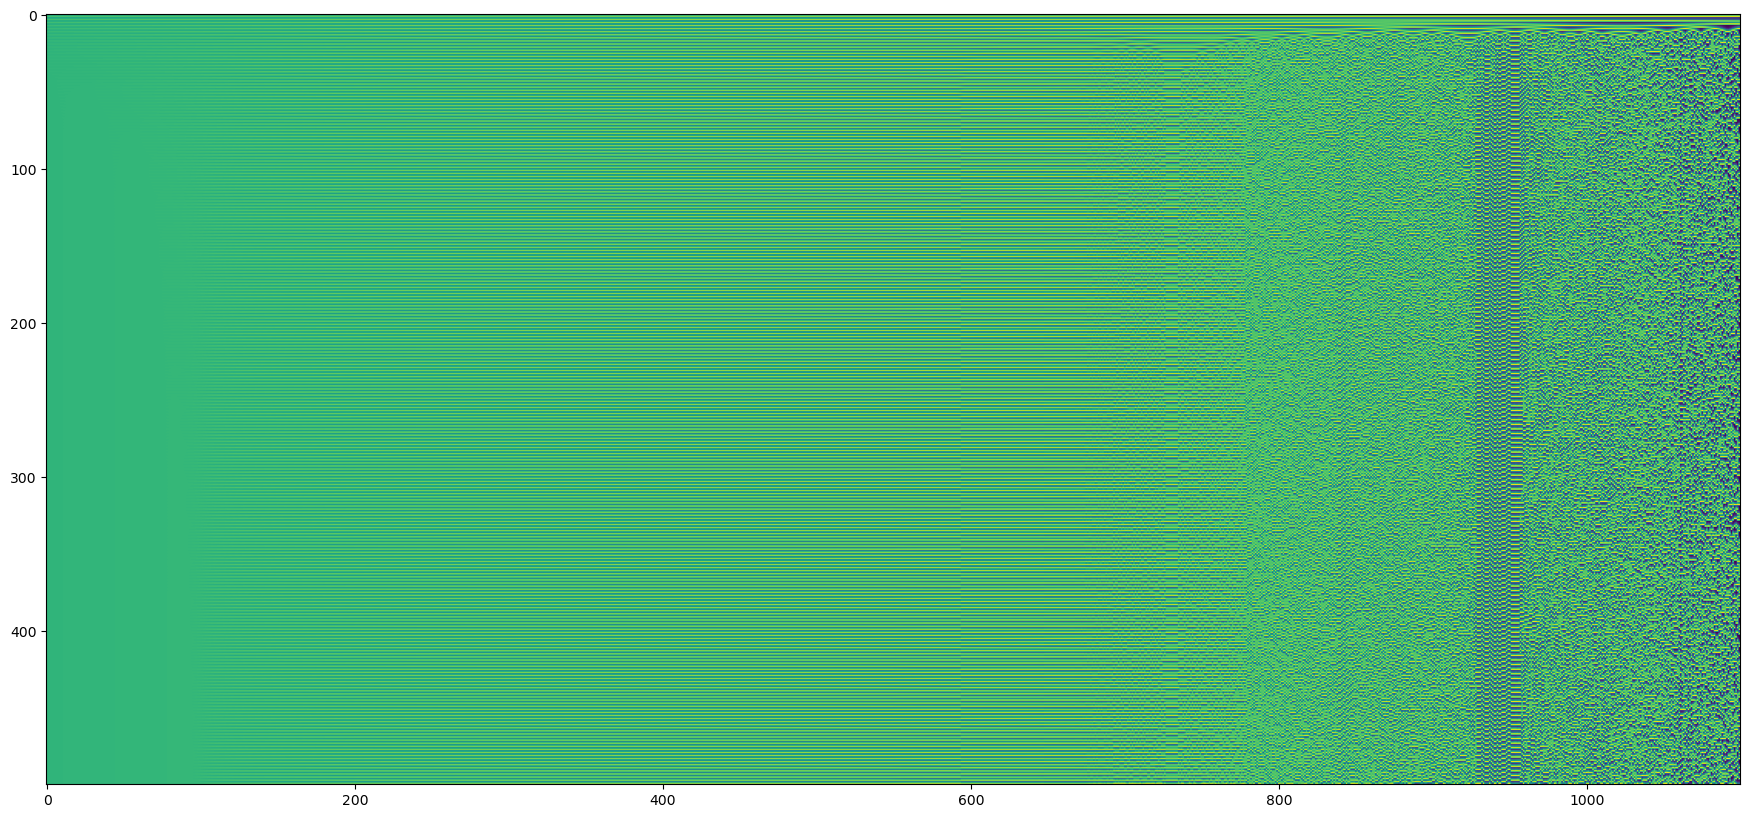

In [129]:

plt.figure(figsize=(30,10))
plt.imshow(r_val_array)

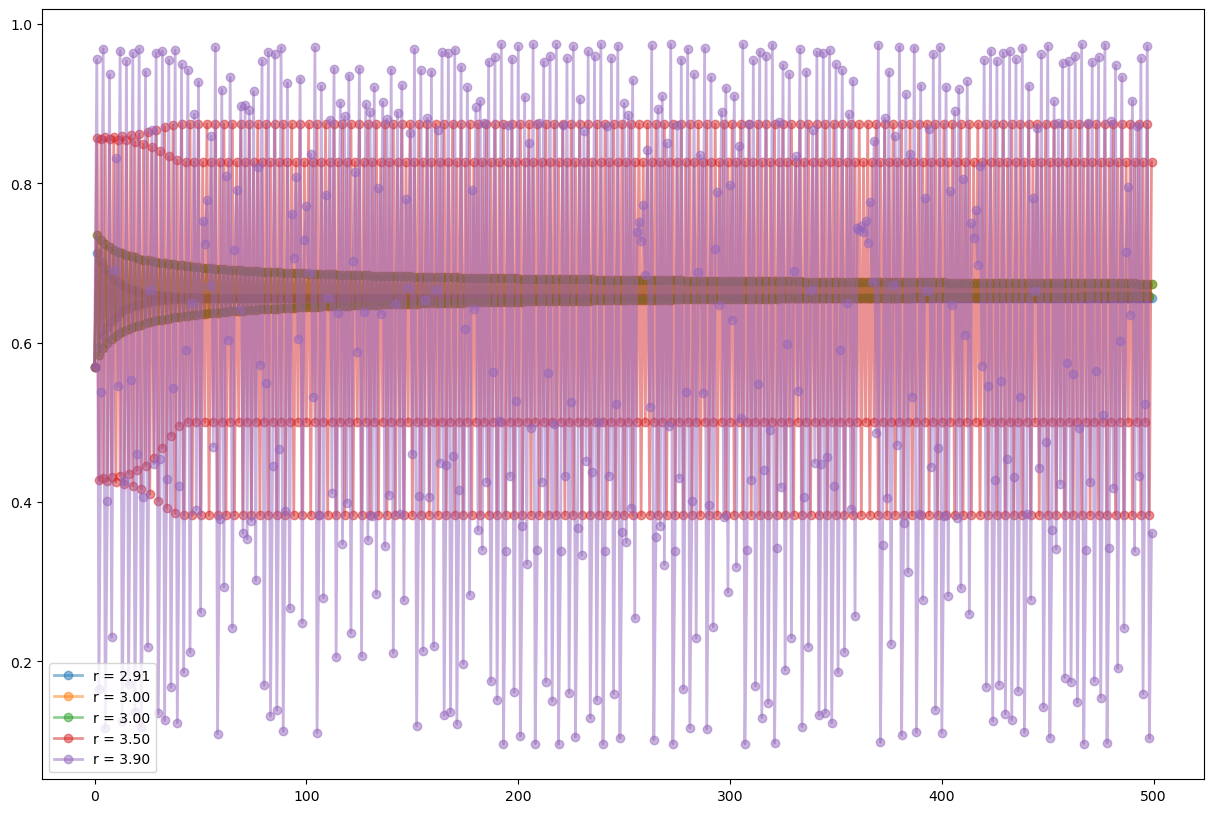

In [218]:
# To-do: Plot specific items

specific_r_vals = [2.91,3.0,3,3.5,3.9]

plt.figure(figsize=(15,10))
for this_specific_r_val in specific_r_vals:

    this_index = list(more_it.locate(it.takewhile(lambda x: x < this_specific_r_val, r_val_range)))[-1]
    # this_index = more_it.first_true(r_val_range, pred=lambda x: x > this_specific_r_val)
    # print(this_index)
    plt.plot(r_val_array[:,this_index], label=f"r = {this_specific_r_val:.2f}",marker='o',lw=2,alpha=0.5)

plt.legend()

In [92]:
df = pd.read_csv('./stress_strain.txt',delimiter='\t')

In [93]:
df

,Position(mm),Load(kN),Strain(-/-),Time(sec)
0,0.00,0.0859,0.000054,0
1,0.03,0.2550,0.000054,1
2,0.07,0.2820,0.000054,2
3,0.10,0.2950,0.000054,3
4,0.13,0.3090,0.000054,4
...,...,...,...,...
368,12.27,18.8000,0.260300,368
369,12.30,18.7000,0.261600,369
370,12.33,18.6000,0.262800,370
371,12.37,18.4000,0.264400,371


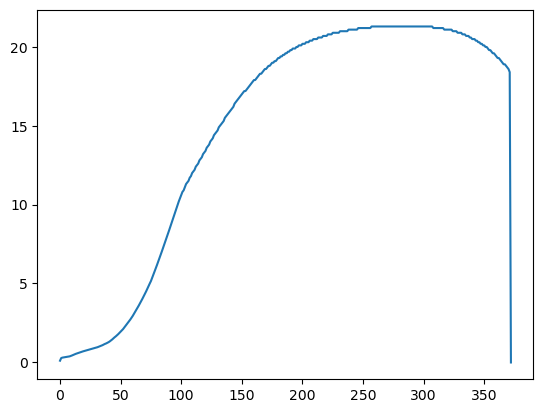

In [94]:
plt.plot(
    df['Time(sec)'],
    df['Load(kN)']
)

# Time Series data

Stress-strain curves and energy analysis